In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# checking the encoding value of csv file
with open("C:\\Users\\bahub\\Desktop\\spam.csv") as f:
    print(f)

<_io.TextIOWrapper name='C:\\Users\\bahub\\Desktop\\spam.csv' mode='r' encoding='cp1252'>


In [3]:
# opening the dataset in 'cp1252' encoding
dataset = pd.read_csv("C:\\Users\\bahub\\Desktop\\spam.csv",encoding='cp1252')

In [4]:
dataset.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
dataset.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2579,ham,I dunno until when... Lets go learn pilates...,NaN,NaN,NaN
784,ham,Dont think so. It turns off like randomlly wit...,NaN,NaN,NaN
4456,ham,Aight should I just plan to come up later toni...,NaN,NaN,NaN
854,ham,Stop the story. I've told him i've returned it...,NaN,NaN,NaN
967,ham,What do u want when i come back?.a beautiful n...,NaN,NaN,NaN


In [6]:
dataset['v2'][1764]

'Hi 07734396839 IBH Customer Loyalty Offer: The NEW NOKIA6600 Mobile from ONLY å£10 at TXTAUCTION!Txt word:START to No:81151 & get Yours Now!4T&'

In [7]:
dataset.rename(columns={'v1':'target','v2':"text"},inplace=True)

In [8]:
dataset.describe()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [9]:
dataset.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
2248,ham,will you like to be spoiled? :),NaN,NaN,NaN
1968,ham,2 laptop... I noe infra but too slow lar... I ...,NaN,NaN,NaN
477,ham,Tension ah?what machi?any problem?,NaN,NaN,NaN
2807,ham,Yes princess! I want to catch you with my big ...,NaN,NaN,NaN
363,ham,Busy here. Trying to finish for new year. I am...,NaN,NaN,NaN


In [10]:
type(dataset['text'][0])

str

In [11]:
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
dataset.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#  data preprocessing:
#       converting to lower case,
#       spliiting in word,
#       removing special character,puncuatation,
#       steming.

In [13]:
import nltk

In [14]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
ps.stem('tommorow')

'tommorow'

In [15]:
stopword = []

In [16]:
# stopword
with open('file.py','r') as f:
    stopword = [row[:-1] for row in f]
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should']


In [17]:
import string

In [18]:
# puncuation 
puncuation = string.punctuation
puncuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
# data preprocessing function
def processed_test(text):
    val = []
    # text =  "".join(text)
    text = text.lower()
    # print(text)
    text = text.split()
    # print(text)
    for i in text:
        if i.isalnum():
            val.append(i)
    text = val[:]
    val.clear()
    # print(text)
    for i in text:
        if i not in puncuation and i not in stopword:
            val.append(i)
    text = val[:]
    val.clear()
    # print(text)
    ps = PorterStemmer()
    for word in text:
        val.append(ps.stem(word))
    text = val[:]
    val.clear()
    # print(text)
    return " ".join(text)

In [20]:
processed_test("hello HOw Are You Hope you are doing well lets meet tommorow")

'hello hope well let meet tommorow'

In [21]:
dataset['text'] = dataset['text'].apply(processed_test)

In [22]:
dataset.sample(5)

,target,text
1624,spam,500 free text text ok 80488 credit account
4850,ham,gain right demand tri husband see
3711,ham,wat u
4017,ham,onlyfound afew day
4651,ham,r e meet


In [23]:
# importing label encoder for encoding spam and ham value in 0 and 1
from sklearn.preprocessing import LabelEncoder
lb =LabelEncoder()


In [24]:
dataset['target'] =  lb.fit_transform(dataset['target'])

In [25]:
dataset.sample(5)

,target,text
4829,0,word chess come persian phrase king good
2157,0,sad stori man last week wife wish parent forgo...
2280,0,r comin back
3355,0,ok problem get c ing tomorrow tuesday think r go
5422,0,ok knw 2 y


In [26]:
dataset.isnull().sum()

target    0
text      0
dtype: int64

In [27]:
dataset.duplicated().sum()

663

In [28]:
dataset.drop_duplicates(keep='first')

,target,text
0,0,go jurong avail bugi n great world la e cine g...
1,0,ok joke wif u
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli u c alreadi
4,0,nah think goe live around though
...,...,...
5567,1,2nd time tri 2 contact u won pound 2 claim cal...
5568,0,b go esplanad fr
5569,0,mood
5570,0,guy bitch act like interest buy someth els nex...


In [29]:
# using word cloud to check which is most frequent word use in spam and ham
from wordcloud import WordCloud
wc = WordCloud(width = 1500,height =1500,min_font_size = 10,background_color = "white")

In [30]:
spam = wc.generate(dataset[dataset['target'] == 1]['text'].str.cat(sep = " "))

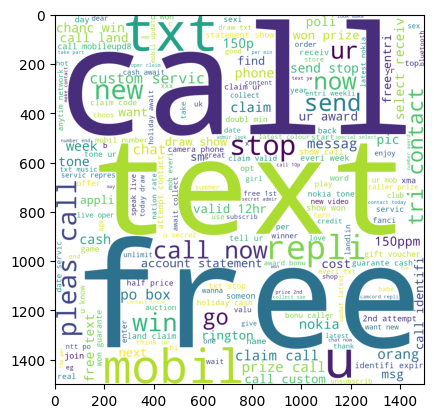

In [31]:
plt.imshow(spam)

In [32]:
ham = wc.generate(dataset[dataset['target'] == 0]['text'].str.cat(sep = " "))

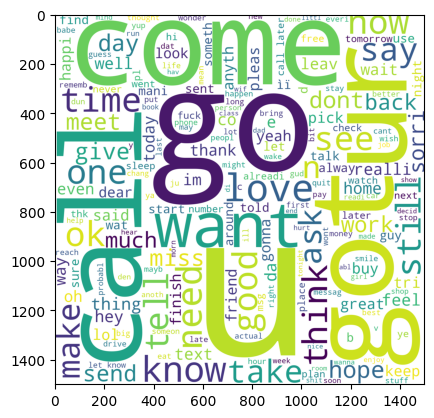

In [33]:
plt.imshow(ham)

In [34]:
from collections import Counter
Counter(" ".join(dataset["text"]).split()).most_common(100)

[('u', 991),
 ('call', 624),
 ('2', 453),
 ('get', 433),
 ('go', 423),
 ('ur', 379),
 ('come', 276),
 ('4', 249),
 ('now', 247),
 ('like', 247),
 ('know', 243),
 ('got', 234),
 ('want', 232),
 ('free', 228),
 ('text', 204),
 ('love', 202),
 ('send', 199),
 ('good', 199),
 ('time', 191),
 ('need', 175),
 ('ok', 160),
 ('think', 159),
 ('txt', 158),
 ('take', 158),
 ('see', 157),
 ('one', 156),
 ('tell', 154),
 ('r', 153),
 ('still', 150),
 ('make', 147),
 ('n', 143),
 ('repli', 140),
 ('day', 138),
 ('new', 136),
 ('dont', 135),
 ('mobil', 134),
 ('say', 127),
 ('ask', 126),
 ('pleas', 123),
 ('stop', 123),
 ('back', 121),
 ('hope', 120),
 ('miss', 114),
 ('meet', 113),
 ('home', 112),
 ('phone', 110),
 ('give', 109),
 ('claim', 108),
 ('tri', 108),
 ('wait', 106),
 ('hi', 103),
 ('pl', 100),
 ('happi', 99),
 ('work', 95),
 ('later', 94),
 ('today', 94),
 ('much', 93),
 ('d', 93),
 ('pick', 90),
 ('thank', 89),
 ('thing', 89),
 ('feel', 88),
 ('great', 87),
 ('sorri', 87),
 ('let', 86),

In [35]:
print(dataset['text'])

0       go jurong avail bugi n great world la e cine g...
1                                           ok joke wif u
2       free entri 2 wkli comp win fa cup final tkt 21...
3                             u dun say earli u c alreadi
4                        nah think goe live around though
                              ...                        
5567    2nd time tri 2 contact u won pound 2 claim cal...
5568                                     b go esplanad fr
5569                                                 mood
5570    guy bitch act like interest buy someth els nex...
5571                                            true name
Name: text, Length: 5572, dtype: object


In [36]:
# spam ---> 1
# ham ---->0

In [37]:
# use to convert each text into a 1D vector
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1628,stop_words='english')


In [38]:
x = cv.fit_transform(dataset['text']).toarray()

In [39]:
print(cv.get_feature_names_out().shape)

(1628,)


In [40]:
# x = x.reshape(-1,1)

In [41]:
x.shape

(5572, 1628)

In [42]:
y = dataset['target'].values

In [43]:
y.shape

(5572,)

In [44]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [45]:
# traing data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
x_train[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
x_train[0].shape

(1628,)

In [48]:
x_train.shape

(4457, 1628)

In [51]:
y_train.shape

(4457,)

In [49]:
x_test.shape

(1115, 1628)

In [ ]:
# importing MultinomialNB for building model
from sklearn.naive_bayes import MultinomialNB
mltnb = MultinomialNB()
mltnb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_predict = mltnb.predict(x_test)

In [ ]:
y_predict.shape

(1115,)

In [ ]:
x_test[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# data preprocessing for predicting the new result
def predict(text):
    new_text = processed_test(text)
    new_text = [new_text]
    transformed_text = cv.transform(new_text).toarray()
    predicted_value = mltnb.predict(transformed_text)
    if predicted_value[0] == 0:
        return "ham"
    else:
        return "spam"

In [ ]:
predict('Hi 07734396839 IBH Customer Loyalty Offer: The NEW NOKIA6600 Mobile from ONLY å£10 at TXTAUCTION!Txt word:START to No:81151 & get Yours Now!4T&')

'spam'

In [ ]:
# making classification report ,accuracy score and precision score
from sklearn.metrics import classification_report,accuracy_score,precision_score
print(classification_report(y_test,y_predict))
print(f"the precision is {precision_score(y_test,y_predict)}")
print(f"the accuracy is {accuracy_score(y_test,y_predict)}")

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.92      0.89      0.91       150

    accuracy                           0.98      1115
   macro avg       0.95      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115

the precision is 0.9241379310344827
the accuracy is 0.9757847533632287


In [ ]:
# hyper parameter tuning function
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score,accuracy_score

def feature():
    precision = {}
    accuracy  = {}
    mltnb = MultinomialNB()
    for i in range(1000,5001):
        cv= CountVectorizer(max_features=i,stop_words='english')
        x = cv.fit_transform(dataset['text']).toarray()
        y = dataset['target'].values
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
        mltnb.fit(x_train,y_train)
        y_predict = mltnb.predict(x_test)
        precision[i] = precision_score(y_test,y_predict)
        accuracy[i] = accuracy_score(y_test,y_predict)
        print(f"  {i}     accuracy_score:{accuracy[i]},precision_score : {precision[i]}")
    
    highest_precision = max(precision,key = lambda k :precision[k])
    highest_accuracy = max(accuracy,key = lambda b : accuracy[b])
    return (highest_accuracy,highest_precision)